In [3]:
import numpy as np
from scipy.spatial import Voronoi, voronoi_plot_2d

import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection

from ipywidgets import widgets
from ipywidgets import interactive

In [4]:
x_bounds = np.array([0, 13])
y_bounds = np.array([0, 16])

x_buffer, y_buffer = 1, 1

x_plot = x_bounds + np.array([x_buffer, -x_buffer])
y_plot = y_bounds + np.array([y_buffer, -y_buffer])

In [5]:
num_points = 300

In [6]:
x = np.random.uniform(*x_bounds, size=num_points).reshape((num_points, 1))
y = np.random.uniform(*y_bounds, size=num_points).reshape((num_points, 1))

pts = np.hstack([x, y])

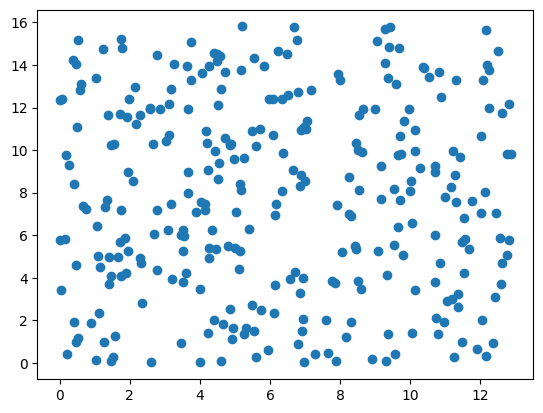

In [7]:
plt.scatter(*pts.transpose())

In [8]:
vor = Voronoi(pts)
verts = vor.vertices
shapes_ind = vor.regions

In [9]:
verts[0:5, :]

array([[ 1.12357206, 15.359711  ],
       [ 1.47142747, 14.9936938 ],
       [ 1.62370944, 13.99159595],
       [ 1.15564051, 14.05748148],
       [ 0.86278415, 30.66903729]])

In [10]:
shapes_ind[10]

[106, 39, 34, 35, 105]

In [11]:
verts[shapes_ind[10]]

array([[11.69245345, 12.56274927],
       [12.32229439, 12.65077656],
       [13.07728265, 13.16435914],
       [11.68344869, 13.69205809],
       [11.67920281, 12.583     ]])

In [12]:
shapes_ind = [s+s[0:1] for s in shapes_ind if len(s)>0 and -1 not in s]
shapes = [verts[s] for s in shapes_ind]

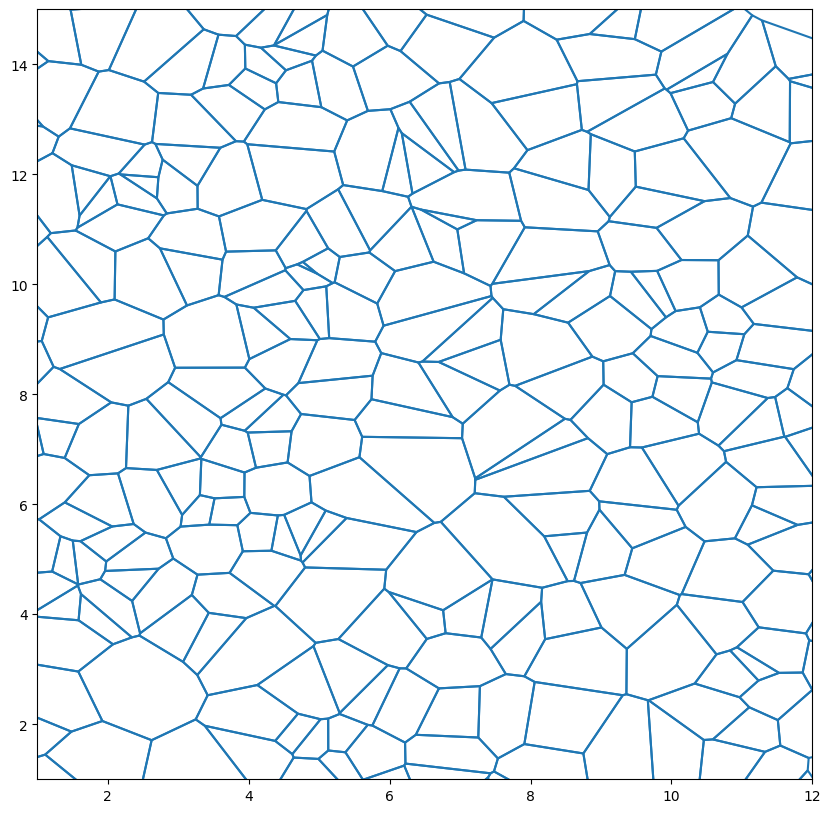

In [13]:
fig, ax = plt.subplots(figsize=(10,10))
ax.set_xlim(*x_plot)
ax.set_ylim(*y_plot)
lc = LineCollection(shapes)
ax.add_collection(lc)

In [14]:
polygon_ind = 15
polygon = shapes[polygon_ind]

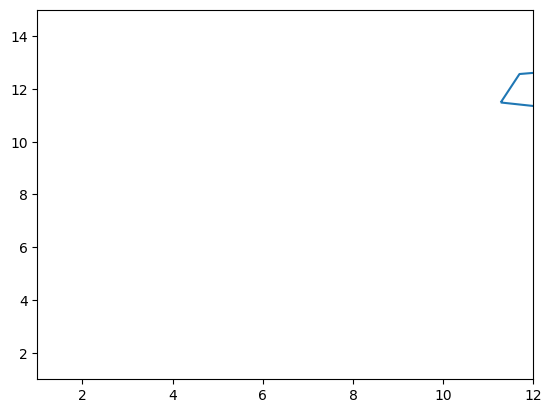

In [15]:
fig, ax = plt.subplots()
ax.set_xlim(*x_plot)
ax.set_ylim(*y_plot)
lc = LineCollection([polygon])
ax.add_collection(lc)

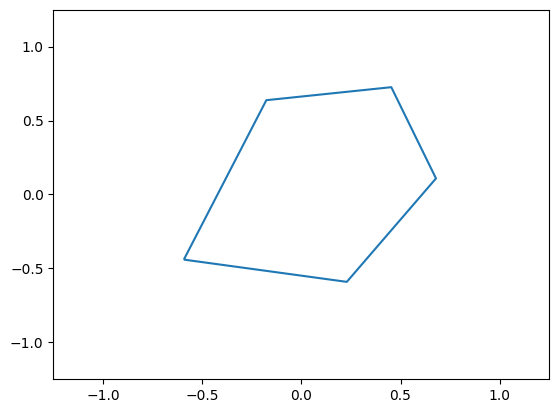

In [16]:
#here is the detailed steps that how we get the diagram
center = np.mean(polygon, axis=0)


fig, ax = plt.subplots()
ax.set_xlim(-1.25, 1.25)
ax.set_ylim(-1.25, 1.25)
lc = LineCollection([polygon - center])
ax.add_collection(lc)

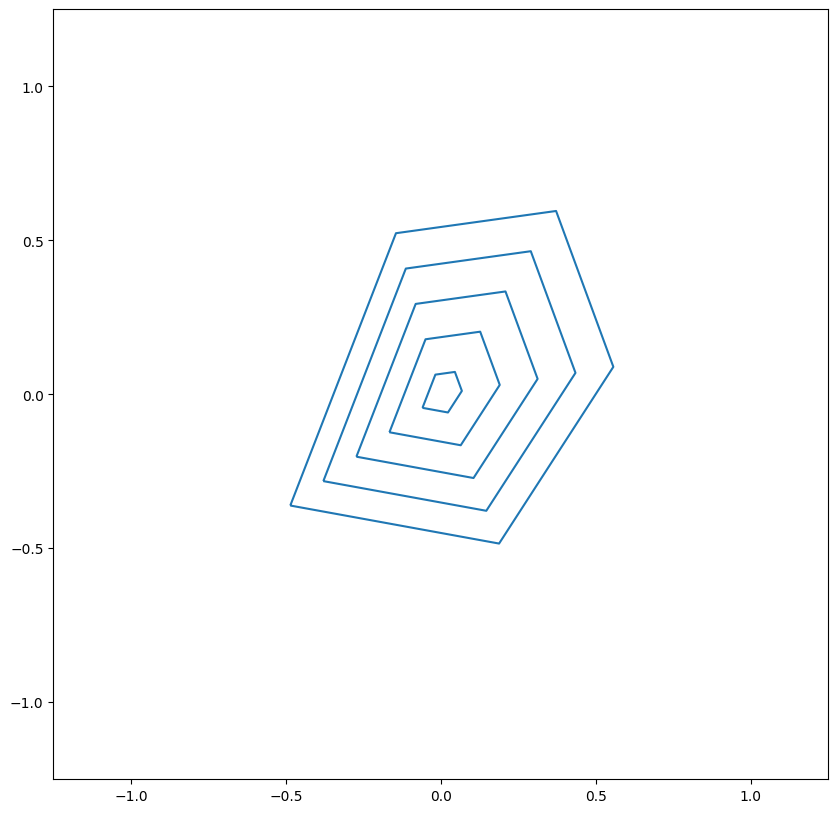

In [17]:
rescaled = []

n_fill_lines = 5
min_scalar = 0.1

for scaler in np.linspace(min_scalar, 1, num=n_fill_lines, endpoint=False):
    scaled = scaler*(polygon - center)
    rescaled.append(scaled)
    
    
fig, ax = plt.subplots(figsize=(10,10))
ax.set_xlim(-1.25, 1.25)
ax.set_ylim(-1.25, 1.25)
lc = LineCollection(rescaled)
ax.add_collection(lc)

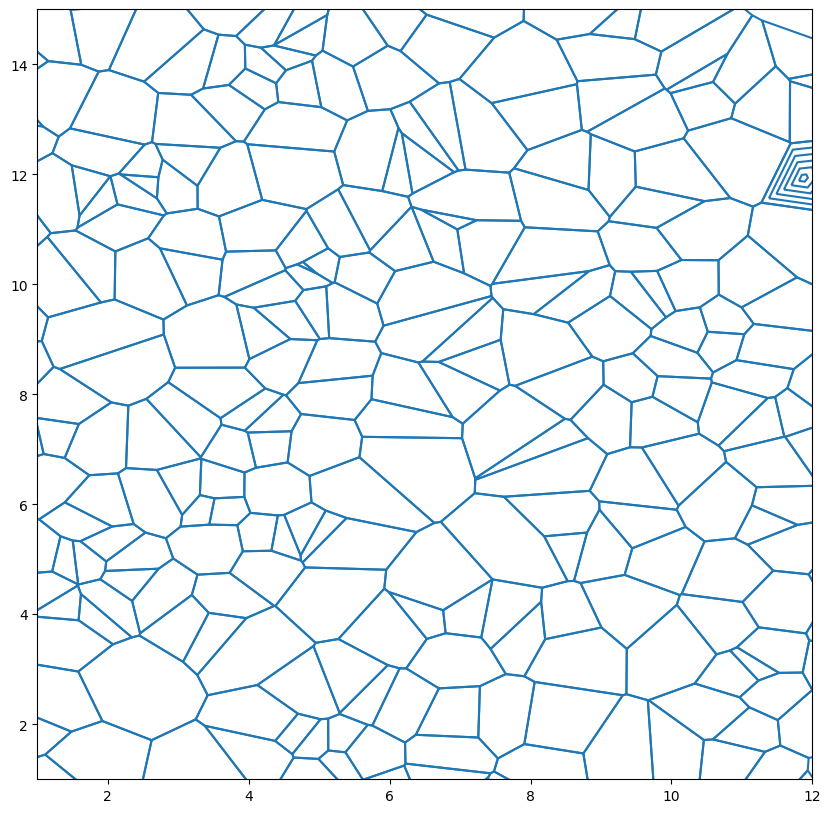

In [18]:
filled_polygon = shapes

n_fill_lines = 5
min_scalar = 0.1

for scaler in np.linspace(min_scalar, 1, num=n_fill_lines, endpoint=False):
    scaled = scaler*(polygon - center) + center
    filled_polygon.append(scaled)
    
    
fig, ax = plt.subplots(figsize=(10,10))
ax.set_xlim(*x_plot)
ax.set_ylim(*y_plot)
lc = LineCollection(filled_polygon)
ax.add_collection(lc)

In [19]:
def make_some_art(num_points=200, percent_to_fill = 0.5, n_fill_lines=5, min_scalar = 0.1,  debug=False, toggle_for_new=False):

    x = np.random.uniform(*x_bounds, size=num_points).reshape((num_points, 1))
    y = np.random.uniform(*y_bounds, size=num_points).reshape((num_points, 1))
    pts = np.hstack([x, y])

    vor = Voronoi(pts)
    verts = vor.vertices
    shapes_ind = vor.regions

    shapes_ind = [s+s[0:1] for s in shapes_ind if len(s)>0 and -1 not in s]
    shapes = [verts[s] for s in shapes_ind]

    n_shapes_to_fill = int(percent_to_fill*len(shapes))
    shapes_to_fill = np.random.choice(shapes, size=n_shapes_to_fill, replace=False)

    fill = []

    for s in shapes_to_fill:
        center = np.mean(s, axis=0)
        for scaler in np.linspace(min_scalar, 1, num=n_fill_lines, endpoint=False):
            scaled = scaler*(s - center) + center
            fill.append(scaled)


    fig, ax = plt.subplots(figsize=(20,20))
    ax.set_aspect('equal')

    if not debug:
        plt.grid(False)
        plt.axis('off')


    ax.set_xlim(*x_plot)
    ax.set_ylim(*y_plot)
    lc = LineCollection(shapes+fill,color='pink',linewidths=5)
    ax.add_collection(lc)

    return fig, ax

w = interactive(make_some_art,
                num_points=(10,1000,25),
                percent_to_fill=(0., 1., 0.05),
                n_fill_lines=(1, 20, 1),
                min_scalar=(0,1,0.01))
display(w)

In [20]:
fig, ax = w.result
fig.savefig('image.png', bbox_inches = 'tight', pad_inches = 0)

In [ ]:
from PIL import Image, ImageFilter

# image
image = Image.open("image.png")

# filter
def apply_filter(filter_name):
    if filter_name == "BLUR":
        image_filtered = image.filter(ImageFilter.BLUR)
    elif filter_name == "CONTOUR":
        image_filtered = image.filter(ImageFilter.CONTOUR)
    elif filter_name == "DETAIL":
        image_filtered = image.filter(ImageFilter.DETAIL)
    elif filter_name == "EDGE_ENHANCE":
        image_filtered = image.filter(ImageFilter.EDGE_ENHANCE)
    elif filter_name == "EMBOSS":
        image_filtered = image.filter(ImageFilter.EMBOSS)
    elif filter_name == "FIND_EDGES":
        image_filtered = image.filter(ImageFilter.FIND_EDGES)
    elif filter_name == "SHARPEN":
        image_filtered = image.filter(ImageFilter.SHARPEN)
    else:
        image_filtered = image
    
    # image after filter
    image_filtered.show()

# game
while True:
    # choose one filter
    filter_name = input("Please enter a filter name（BLUR, CONTOUR, DETAIL, EDGE_ENHANCE, EMBOSS, FIND_EDGES, SHARPEN），enter quit to stop the game：").upper()
    if filter_name == "QUIT":
        break
    
    # use filter
    apply_filter(filter_name)


Please enter a filter name（BLUR, CONTOUR, DETAIL, EDGE_ENHANCE, EMBOSS, FIND_EDGES, SHARPEN），enter quit to stop the game：CONTOUR
Please enter a filter name（BLUR, CONTOUR, DETAIL, EDGE_ENHANCE, EMBOSS, FIND_EDGES, SHARPEN），enter quit to stop the game：DETAIL
Please enter a filter name（BLUR, CONTOUR, DETAIL, EDGE_ENHANCE, EMBOSS, FIND_EDGES, SHARPEN），enter quit to stop the game：EDGE_ENHANCE
Please enter a filter name（BLUR, CONTOUR, DETAIL, EDGE_ENHANCE, EMBOSS, FIND_EDGES, SHARPEN），enter quit to stop the game：EMBOSS
Please enter a filter name（BLUR, CONTOUR, DETAIL, EDGE_ENHANCE, EMBOSS, FIND_EDGES, SHARPEN），enter quit to stop the game：FIND_EDGES
Please enter a filter name（BLUR, CONTOUR, DETAIL, EDGE_ENHANCE, EMBOSS, FIND_EDGES, SHARPEN），enter quit to stop the game：SHARPEN
Please enter a filter name（BLUR, CONTOUR, DETAIL, EDGE_ENHANCE, EMBOSS, FIND_EDGES, SHARPEN），enter quit to stop the game：BLUR
